In [1]:
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
import trimesh as tm 
import tkinter as tk
from tkinter import filedialog 
import pandas as pd
import os
import seaborn as sns



### Load mesh

In [13]:
def select_file():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    mesh_file = filedialog.askopenfile()
    return mesh_file
def select_files():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    mesh_file = filedialog.askopenfiles()
    return mesh_file
def select_directory():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    dir_path = filedialog.askdirectory()  # Open the directory selection dialog
    return dir_path

In [14]:
#select surface meshes
mesh_f = select_files()
print(f'Selected directory: {mesh_f}')

Selected directory: [<_io.TextIOWrapper name='D:/checkouts/ML-Training/MK_Course/Data/Mesh_s/0.obj' mode='r' encoding='cp1252'>, <_io.TextIOWrapper name='D:/checkouts/ML-Training/MK_Course/Data/Mesh_s/4.obj' mode='r' encoding='cp1252'>, <_io.TextIOWrapper name='D:/checkouts/ML-Training/MK_Course/Data/Mesh_s/6.obj' mode='r' encoding='cp1252'>, <_io.TextIOWrapper name='D:/checkouts/ML-Training/MK_Course/Data/Mesh_s/8.obj' mode='r' encoding='cp1252'>, <_io.TextIOWrapper name='D:/checkouts/ML-Training/MK_Course/Data/Mesh_s/9.obj' mode='r' encoding='cp1252'>, <_io.TextIOWrapper name='D:/checkouts/ML-Training/MK_Course/Data/Mesh_s/10.obj' mode='r' encoding='cp1252'>, <_io.TextIOWrapper name='D:/checkouts/ML-Training/MK_Course/Data/Mesh_s/12.obj' mode='r' encoding='cp1252'>, <_io.TextIOWrapper name='D:/checkouts/ML-Training/MK_Course/Data/Mesh_s/14.obj' mode='r' encoding='cp1252'>, <_io.TextIOWrapper name='D:/checkouts/ML-Training/MK_Course/Data/Mesh_s/15.obj' mode='r' encoding='cp1252'>, <_i

In [18]:
s_mesh = tm.load('6.obj', process = False)

#check mesh details
print(s_mesh)



<trimesh.Trimesh(vertices.shape=(35186, 3), faces.shape=(70532, 3), name=`6.obj`)>


In [21]:
#thickness calculation

#mesh = tm.load('mesh.stl', process=False)
start_points = s_mesh.vertices - 0.001 * s_mesh.vertex_normals # hacky way to get points slightly inside
thickness = tm.proximity.thickness(s_mesh, start_points, s_mesh.vertex_normals)

# visualisation with pyvista
import pyvista as pv
pv.wrap(s_mesh).plot(scalars=thickness)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [6]:
pv.set_jupyter_backend('trame')

In [22]:
p = pv.Plotter()
file = '20.obj'
m = pv.read(file)
for i in range(len(mesh_f)):
    #reader = pv.get_reader(mesh_file)
    filename = mesh_f[i].name
    mesh_i = pv.read(filename)
    p.add_mesh(mesh_i, opacity=0.15,show_edges=True, color=True)
p.show()

Widget(value='<iframe src="http://localhost:55725/index.html?ui=P_0x17a7c6cfa60_1&reconnect=auto" class="pyvis…

In [24]:
p = pv.Plotter()
file = '20.obj'
m = pv.read(file)
p.add_mesh(m, opacity=0.45,show_edges=True, color=True)
p.show()

Widget(value='<iframe src="http://localhost:55725/index.html?ui=P_0x17a79bc39d0_3&reconnect=auto" class="pyvis…

In [25]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Read the csv simulation files

In [91]:
sim_data = pd.read_csv("4field.csv")

In [28]:
sim_data.head()

,id,surf,x,y,z,ver_xdisp,ver_ydisp,ver_zdisp,ver_magdisp,ver_stress,...,dia_xdisp,dia_ydisp,dia_zdisp,dia_magdisp,dia_stress,tor_xdisp,tor_ydisp,tor_zdisp,tor_magdisp,tor_stress
0,1,2,33.55791,-144.4971,7.5486,0.000000e+00,1.084202e-19,2.168404e-19,2.424350e-19,374.9198,...,8.131516e-20,1.355253e-19,6.776264e-20,1.719623e-19,204.6066,5.421011e-20,8.131516e-20,1.355253e-20,9.866389e-20,191.8409
1,2,2,33.87541,-143.9884,7.5486,0.000000e+00,1.084202e-19,2.168404e-19,2.424350e-19,383.7608,...,0.000000e+00,2.168404e-19,2.710505e-20,2.185279e-19,199.2507,0.000000e+00,0.000000e+00,-1.084202e-19,1.084202e-19,201.2667
2,3,2,34.24981,-143.5201,7.5486,-1.626303e-19,2.710505e-19,-1.084202e-19,3.341735e-19,375.2679,...,-3.388132e-20,-1.084202e-19,-6.776264e-21,1.137928e-19,181.4222,-1.897354e-19,2.981556e-19,-4.065758e-20,3.557377e-19,197.0795
3,4,2,34.67606,-143.0984,7.5486,3.523657e-19,4.065758e-19,5.421011e-20,5.407441e-19,390.6238,...,2.371692e-20,-2.710505e-19,8.131516e-20,2.839772e-19,174.0906,8.131516e-20,-2.168404e-19,2.032879e-20,2.324762e-19,208.6066
4,5,2,35.14838,-142.7290,7.5486,4.336809e-19,0.000000e+00,1.626303e-19,4.631714e-19,390.5971,...,4.065758e-20,0.000000e+00,-4.065758e-20,5.749850e-20,158.0594,-2.710505e-20,0.000000e+00,-7.453890e-20,7.931413e-20,216.2781


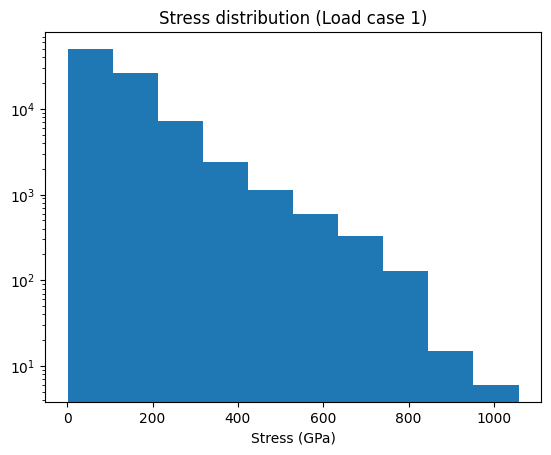

1057.485
1.09544


In [92]:
ver_stress = sim_data['ver_stress']
plt.hist(ver_stress, log=True) #np.log(k), density=True, log=True
plt.title('Stress distribution (Load case 1)')
plt.xlabel('Stress (GPa)')
plt.show()

print(ver_stress.max())
print(ver_stress.min())

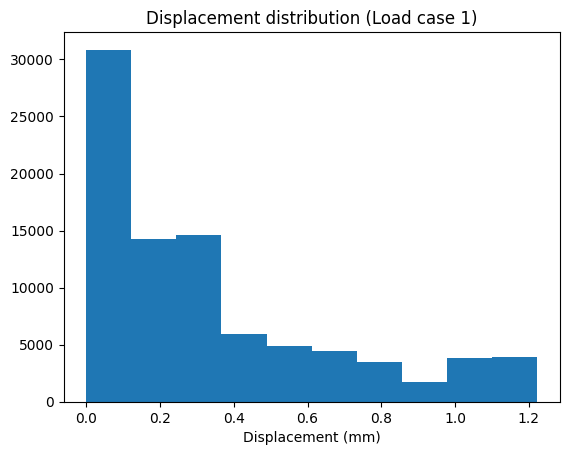

1.222151
0.0


In [93]:
ver_dis = sim_data['ver_magdisp']
plt.hist(ver_dis) #np.log(k), density=True, log=True
plt.title('Displacement distribution (Load case 1)')
plt.xlabel('Displacement (mm)')
plt.show()

print(ver_dis.max())
print(ver_dis.min())

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'surf'}>,
        <AxesSubplot: title={'center': 'x'}>,
        <AxesSubplot: title={'center': 'y'}>,
        <AxesSubplot: title={'center': 'z'}>],
       [<AxesSubplot: title={'center': 'ver_xdisp'}>,
        <AxesSubplot: title={'center': 'ver_ydisp'}>,
        <AxesSubplot: title={'center': 'ver_zdisp'}>,
        <AxesSubplot: title={'center': 'ver_magdisp'}>,
        <AxesSubplot: title={'center': 'ver_stress'}>],
       [<AxesSubplot: title={'center': 'hor_xdisp'}>,
        <AxesSubplot: title={'center': 'hor_ydisp'}>,
        <AxesSubplot: title={'center': 'hor_zdisp'}>,
        <AxesSubplot: title={'center': 'hor_magdisp'}>,
        <AxesSubplot: title={'center': 'hor_stress'}>],
       [<AxesSubplot: title={'center': 'dia_xdisp'}>,
        <AxesSubplot: title={'center': 'dia_ydisp'}>,
        <AxesSubplot: title={'center': 'dia_zdisp'}>,
        <AxesSubplot: title={'center': 'dia_magdisp'}>,

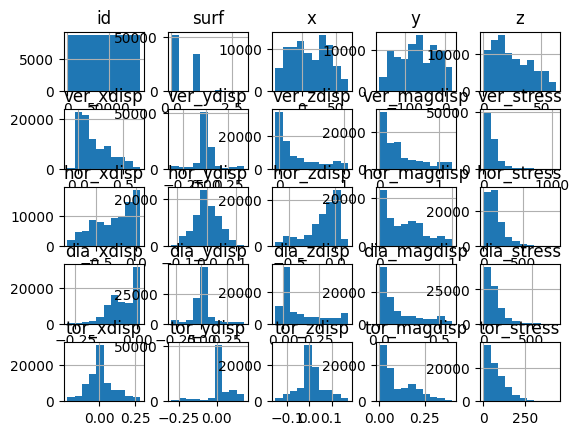

In [5]:
sim_data.hist()

## Plot top 20% of stresses 

In [40]:
x = sim_data.sort_values(by="ver_stress", inplace=True, axis=0, ascending=False)
x = sim_data
print(x['ver_stress'][0])
print(x['ver_stress'].max())
print(x['ver_stress'][0]+x['ver_stress'][1])

374.9198
1057.485
758.6806


In [42]:
sim_data.dtypes

id               int64
surf             int64
x              float64
y              float64
z              float64
ver_xdisp      float64
ver_ydisp      float64
ver_zdisp      float64
ver_magdisp    float64
ver_stress     float64
hor_xdisp      float64
hor_ydisp      float64
hor_zdisp      float64
hor_magdisp    float64
hor_stress     float64
dia_xdisp      float64
dia_ydisp      float64
dia_zdisp      float64
dia_magdisp    float64
dia_stress     float64
tor_xdisp      float64
tor_ydisp      float64
tor_zdisp      float64
tor_magdisp    float64
tor_stress     float64
dtype: object

In [2]:
mesh_4 = select_file()

NameError: name 'select_file' is not defined

In [99]:
mesh = pv.read(mesh_4.name)
mesh['Displacement (mm)'] = sim_data['ver_magdisp']
cpos = mesh.plot()

Widget(value='<iframe src="http://localhost:63269/index.html?ui=P_0x1bd55a20fd0_5&reconnect=auto" class="pyvis…

In [81]:
coords = sim_data[['x', 'y', 'z']].values

# Preview the coordinates
poly = pv.PolyData(coords)
poly['displacement'] = sim_data['ver_magdisp']
poly.plot(notebook=False, show_grid=True, point_size=1)

 ## view max values

In [15]:
#select csv simulation results
file_list = select_files()

In [7]:
ver_stress_max = []
hor_stress_max = []
dia_stress_max = []
tor_stress_max = []
ver_disp_max = []
hor_disp_max = []
dia_disp_max = []
tor_disp_max = []

for data_f in file_list:
    sim_data = pd.read_csv(data_f.name)
    ver_stress_max.append(sim_data['ver_stress'].max())
    hor_stress_max.append(sim_data['hor_stress'].max())
    dia_stress_max.append(sim_data['dia_stress'].max())
    tor_stress_max.append(sim_data['tor_stress'].max())
    ver_disp_max.append(sim_data['ver_magdisp'].max())
    hor_disp_max.append(sim_data['hor_magdisp'].max())
    dia_disp_max.append(sim_data['dia_magdisp'].max())
    tor_disp_max.append(sim_data['tor_magdisp'].max())



In [23]:
#View all stresses Load case 1
ver_stress_all = []
ver_stress_all = np.array(ver_stress_all)
for data_f in file_list:
    sim_data = pd.read_csv(data_f.name)
    ver_stress_all = np.append(ver_stress_all, sim_data['ver_stress'])


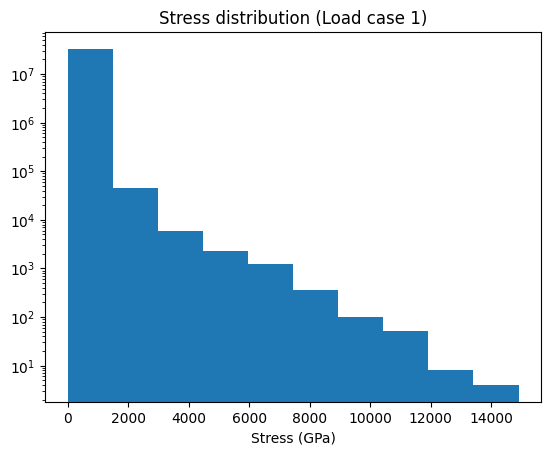

In [24]:
#ver_stress_all = (np.array(ver_stress_all).flatten())
plt.hist(ver_stress_all, log=True) #np.log(k), density=True, log=True
plt.title('Stress distribution (Load case 1)')
plt.xlabel('Stress (GPa)')
plt.show()

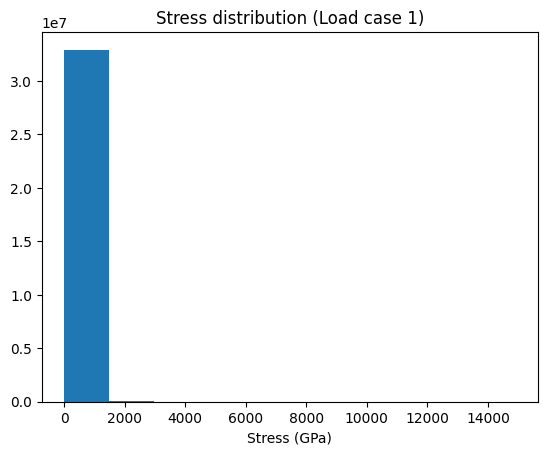

In [25]:
#ver_stress_all = (np.array(ver_stress_all).flatten())
plt.hist(ver_stress_all) #np.log(k), density=True, log=True
plt.title('Stress distribution (Load case 1)')
plt.xlabel('Stress (GPa)')
plt.show()

### Merge all the sim results

In [27]:
sim_data_all = pd.read_csv(file_list[0].name)
for i in range(len(file_list)-1):
    data_f = file_list[i+1]
    sim_data_i = pd.read_csv(data_f.name)
    sim_data_all = pd.concat([sim_data_all, sim_data_i], ignore_index=True)

In [28]:
sim_data_all.describe()[['ver_stress', 'dia_stress', 'hor_stress', 'tor_stress']]

,ver_stress,dia_stress,hor_stress,tor_stress
count,3.298348e+07,3.298348e+07,3.298348e+07,3.298348e+07
mean,1.364674e+02,9.621752e+01,1.289776e+02,5.329667e+01
std,1.797367e+02,1.151908e+02,1.642554e+02,7.148114e+01
min,3.601561e-04,4.547896e-04,1.409005e-04,1.883419e-04
25%,4.513850e+01,3.346326e+01,4.181611e+01,1.105518e+01
50%,8.829344e+01,6.584474e+01,8.294550e+01,2.787150e+01
75%,1.659892e+02,1.191164e+02,1.578394e+02,6.800931e+01
max,1.490176e+04,1.527893e+04,1.586892e+04,1.415668e+04


In [29]:
sim_data_all.median()

id             4.505700e+04
surf           0.000000e+00
x              1.008155e+01
y             -7.012456e+01
z              1.600310e+01
ver_xdisp      1.975661e-02
ver_ydisp     -5.643538e-04
ver_zdisp      8.986980e-02
ver_magdisp    1.467128e-01
ver_stress     8.829344e+01
hor_xdisp     -6.819889e-02
hor_ydisp      1.421081e-03
hor_zdisp     -8.513642e-03
hor_magdisp    1.271329e-01
hor_stress     8.294550e+01
dia_xdisp     -1.898620e-02
dia_ydisp     -9.486769e-20
dia_zdisp      9.024959e-02
dia_magdisp    1.093354e-01
dia_stress     6.584474e+01
tor_xdisp     -7.609590e-05
tor_ydisp      4.252049e-04
tor_zdisp      0.000000e+00
tor_magdisp    1.673424e-02
tor_stress     2.787150e+01
dtype: float64

<Axes: >

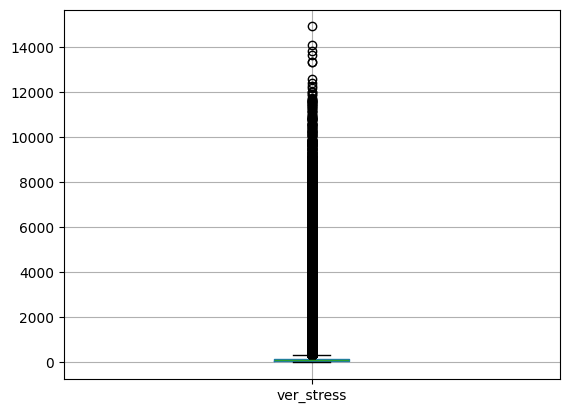

In [30]:
sim_data_all.boxplot(['ver_stress'])

381
381


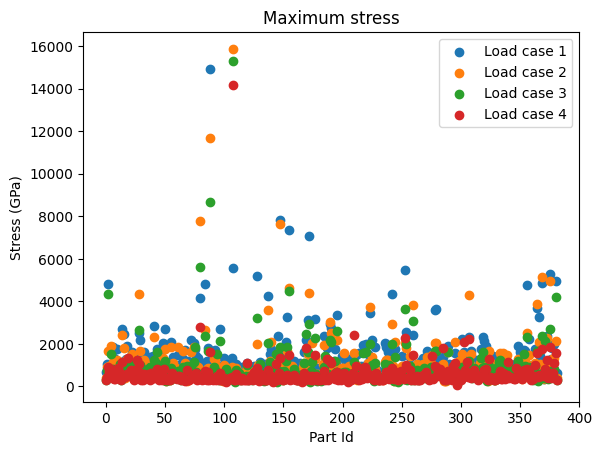

In [63]:
print(len(ver_stress_max))
id = np.linspace(0, len(ver_stress_max), len(ver_stress_max))
print(len(id))
plt.title('Maximum stress')
plt.scatter(id, ver_stress_max, label= 'Load case 1')
plt.scatter(id, hor_stress_max,label= 'Load case 2')
plt.scatter(id,dia_stress_max, label= 'Load case 3')
plt.scatter(id, tor_stress_max,label= 'Load case 4')
plt.ylabel('Stress (GPa)')
plt.xlabel('Part Id')
plt.legend()
plt.show()

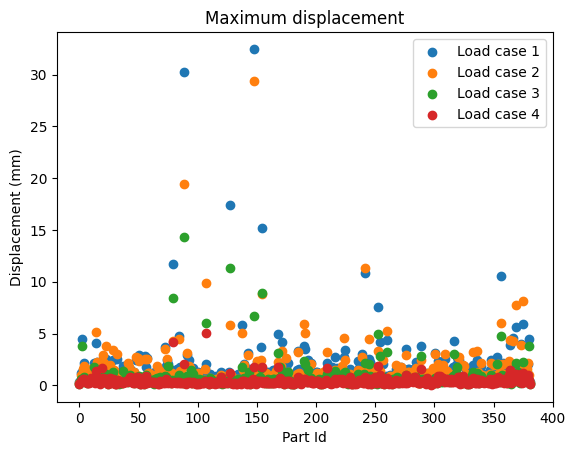

In [64]:

id = np.linspace(0, len(ver_stress_max), len(ver_stress_max))
plt.title('Maximum displacement')
plt.scatter(id, ver_disp_max, label= 'Load case 1')
plt.scatter(id, hor_disp_max,label= 'Load case 2')
plt.scatter(id,dia_disp_max, label= 'Load case 3')
plt.scatter(id, tor_disp_max,label= 'Load case 4')
plt.ylabel('Displacement (mm)')
plt.xlabel('Part Id')
plt.legend()
plt.show()

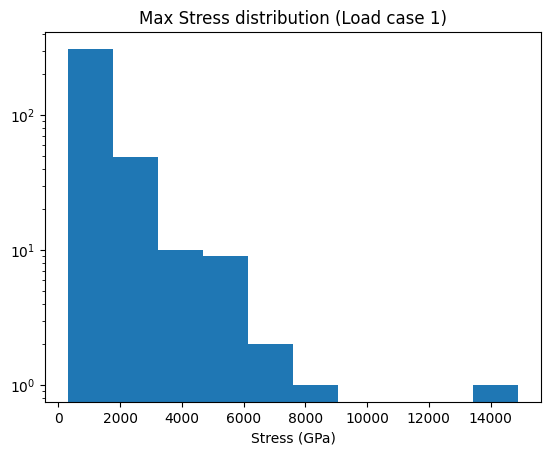

In [67]:

plt.hist(ver_stress_max, log=True) #np.log(k), density=True, log=True
plt.title('Max Stress distribution (Load case 1)')
plt.xlabel('Stress (GPa)')
plt.show()

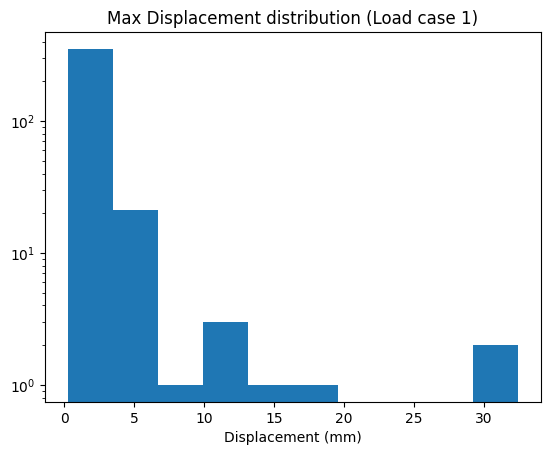

In [82]:
plt.hist(ver_disp_max, log=True) #np.log(k), density=True, log=True
plt.title('Max Displacement distribution (Load case 1)')
plt.xlabel('Displacement (mm)')
plt.show()

### Histograms

In [86]:
ver_stress_l = np.empty(0)
hor_stress_l = np.empty(0)
dia_stress_l = np.empty(0)
tor_stress_l = np.empty(0)
ver_disp_l = np.empty(0)
hor_disp_l = np.empty(0)
dia_disp_l = np.empty(0)
tor_disp_l = np.empty(0)

for data_f in file_list:
    sim_data = pd.read_csv(data_f.name)
    ver_stress_l = np.append(ver_stress_l, np.array(sim_data['ver_stress']))
    hor_stress_l = np.append(hor_stress_l, np.array(sim_data['hor_stress']))
    tor_stress_l = np.append(tor_stress_l, np.array(sim_data['tor_stress']))
    dia_stress_l = np.append(dia_stress_l, np.array(sim_data['dia_stress']))
    ver_disp_l = np.append(ver_disp_l, np.array(sim_data['ver_magdisp']))
    hor_disp_l = np.append(hor_disp_l, np.array(sim_data['hor_magdisp']))
    dia_disp_l = np.append(dia_disp_l, np.array(sim_data['dia_magdisp']))
    tor_disp_l = np.append(tor_disp_l, np.array(sim_data['tor_magdisp']))


    

(32983483,)


TypeError: '<=' not supported between instances of 'builtin_function_or_method' and 'float'

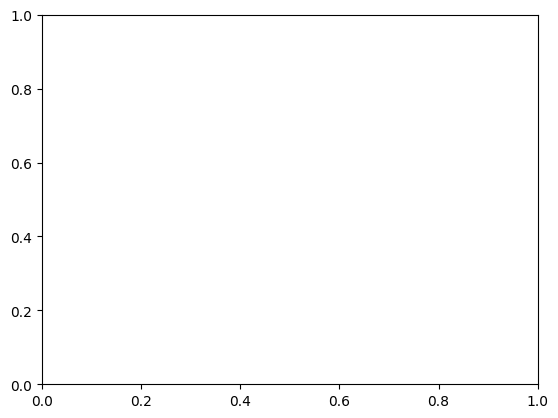

In [79]:
print(ver_stress_l.shape)
plt.hist(ver_stress_l, log=True, bins=20) #np.log(k), density=True, log=True
plt.title('Stress distribution (Load case 1)')
plt.xlabel('Stress (GPa)')
plt.show()

In [85]:
print(np.mean(dia_stress_l))

TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'float'

## using quantile method

In [1]:
import pandas as pd

# Sample DataFrame
data = {
    'stress': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
df = pd.DataFrame(data)

# Calculate the 95th percentile
quantile_value = df['stress'].quantile(0.95)

# Get the top 5% samples
top_5_percent = df[df['stress'] >= quantile_value]

print(top_5_percent)


   stress
9     100


In [22]:
#read data csn into dataframe
n = 18
csv_n = file_list[n]
sim_data_x = pd.read_csv(csv_n.name)



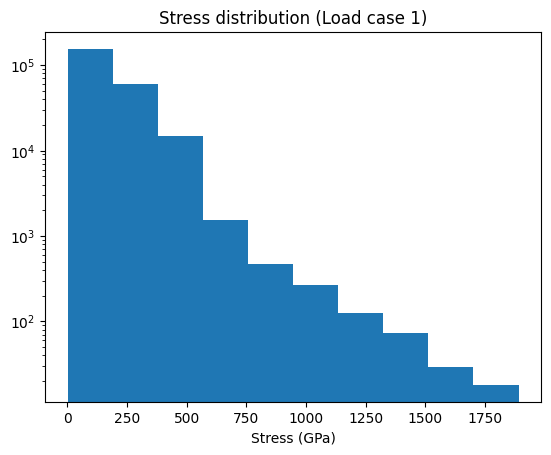

In [23]:
plt.hist(sim_data_x['ver_stress'], log=True) #np.log(k), density=True, log=True
plt.title('Stress distribution (Load case 1)')
plt.xlabel('Stress (GPa)')
plt.show()

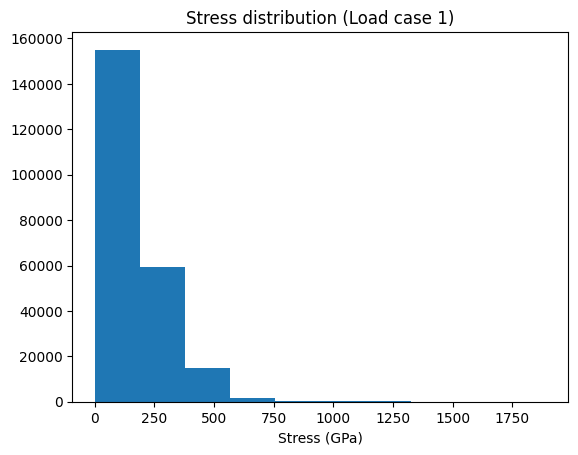

In [19]:
plt.hist(sim_data_x['ver_stress']) #np.log(k), density=True, log=True
plt.title('Stress distribution (Load case 1)')
plt.xlabel('Stress (GPa)')
plt.show()

In [10]:
# find threshold
quantile_value = sim_data_x['ver_stress'].quantile(0.95)
top_5_percent = sim_data_x[sim_data_x['ver_stress'] >= quantile_value]

In [45]:
# find threshold
quantile_value = sim_data_x['ver_stress'].quantile(0.95)
top_5_percent = sim_data_x[sim_data_x['ver_stress'] >= quantile_value]
#vizualize top values
filename = mesh_f[n].name
mesh_i = pv.read(filename)
plotter = pv.Plotter()
_ = plotter.add_mesh(mesh_i, opacity=0.35)
coords = top_5_percent[['x', 'y', 'z']].values
plotter.add_points(coords, scalars=top_5_percent['ver_stress'], render_points_as_spheres=True, point_size=4)
poly = pv.PolyData(coords)
poly['Stress GPa'] = top_5_percent['ver_stress']
#plotter['Stress GPa'] = top_5_percent['ver_stress']
#poly.add_mesh(, )
poly.plot(notebook=False, show_grid=True, point_size=1)
plotter.show(cpos='yx' )

Widget(value='<iframe src="http://localhost:65398/index.html?ui=P_0x2032a23b710_16&reconnect=auto" class="pyvi…

In [6]:
mesh_v = select_files()

In [29]:
filename = mesh_v[n].name
mesh_i = pv.read(filename)

In [30]:
#new array for stresses
top_2_stress = []
quantile_value_2 = sim_data_x['ver_stress'].quantile(0.98)
s_min = sim_data_x['ver_stress'].min()
for i in range(len(sim_data_x['ver_stress'])):
    if sim_data_x['ver_stress'][i] < quantile_value_2:
        top_2_stress.append(s_min)
    else:
        top_2_stress.append(sim_data_x['ver_stress'][i])

top_2_stress = np.array(top_2_stress)

In [11]:
#mesh = pv.read(mesh_4.name)
mesh_i['Stress GPa'] = top_2_stress
cpos = mesh_i.plot()

NameError: name 'top_2_stress' is not defined

In [ ]:
pv.plot(
    points,
    scalars=points[:, 2],
    render_points_as_spheres=True,
    point_size=20,
    show_scalar_bar=False,
)

In [ ]:
for i in range(len(mesh_f)):
    
    filename = mesh_f[i].name
    mesh_i = pv.read(filename)
    p.add_mesh(mesh_i, opacity=0.10, color=True)

    p.save_graphic(str(filename) + ".svg")
    actor = p.add_title(
        str(filename), font='courier', color='k', font_size=40
    )
    p.show()
    p.view_xy()

In [8]:
dir_path = select_directory()

In [10]:
print(dir_path)

D:/checkouts/ML-Training/MK_Course/Data/Preprocessing/load_case_1/Stresses


In [9]:
#filename = mesh_v[n].name
#mesh_i = pv.read(filename)
#os.path.join(dir_path, file_name)
#file_name = os.path.splitext(os.path.basename(file_path))[0]
for n in range(len(mesh_v)):
    
    sim_data = pd.read_csv(file_list[n].name)
    filename = mesh_v[n].name
    mesh_i = pv.read(filename)

    plotter = pv.Plotter()
    _ = plotter.add_mesh(mesh_i, opacity=0.35)
    mesh_i['Stress GPa'] = sim_data['ver_stress']
    plotter.view_xy()
    file_name = str(filename) + ".svg"
    file_path = os.path.join(dir_path, file_name)
    plotter.save_graphic(file_path)

In [41]:
mesh_holes = pv.read('Hole4.stl')
mesh_4 = pv.read('4.obj')
plotter = pv.Plotter()
_ = plotter.add_mesh(mesh_holes)
_ = plotter.add_mesh(mesh_4, opacity=0.70)
#mesh_holes['Stress GPa'] = sim_data['ver_stress']
plotter.view_xy()
plotter.show()

Widget(value='<iframe src="http://localhost:55281/index.html?ui=P_0x164713e2900_391&reconnect=auto" class="pyv…

In [44]:
mesh_holes_ext = pv.read('Hole1_ext.stl')
intersection, s1_split, s2_split = mesh_4.intersection(mesh_holes_ext)
pl = pv.Plotter()
_ = pl.add_mesh(mesh_holes_ext, style='wireframe')
_ = pl.add_mesh(mesh_4, opacity=0.70)
_ = pl.add_mesh(intersection, color='r', line_width=10)
pl.show()

Widget(value='<iframe src="http://localhost:55281/index.html?ui=P_0x154911c7da0_394&reconnect=auto" class="pyv…

In [45]:
intersection, s1_split, s2_split = mesh_4.intersection(mesh_holes)

In [52]:
if len(intersection.points)==0:
    print('no intersection')

no intersection


In [49]:
print(intersection.points)

[]


In [48]:
intersection, s1_split, s2_split = mesh_4.intersection(mesh_holes)
pl = pv.Plotter()
_ = pl.add_mesh(mesh_holes, style='wireframe')
_ = pl.add_mesh(mesh_4, opacity=0.70)
_ = pl.add_mesh(intersection, color='r', line_width=10)
pl.show()

ValueError: Empty meshes cannot be plotted. Input mesh has zero points. To allow plotting empty meshes, set `pv.global_theme.allow_empty_mesh = True`

In [55]:
sim_data_all['ver_stress']
# find threshold
quantile_value = sim_data_all['ver_stress'].quantile(0.995)
top_2_percent = sim_data_all[sim_data_all['ver_stress'] >= quantile_value]
coords = top_2_percent[['x', 'y', 'z']].values
#vizualize top values

mesh_i = mesh_holes_ext
plotter = pv.Plotter()
_ = plotter.add_mesh(mesh_i, opacity=0.35)
coords = top_2_percent[['x', 'y', 'z']].values
plotter.add_points(coords, scalars=top_2_percent['ver_stress'], render_points_as_spheres=True, point_size=4)
poly = pv.PolyData(coords)
poly['Stress GPa'] = top_2_percent['ver_stress']
#plotter['Stress GPa'] = top_5_percent['ver_stress']
#poly.add_mesh(, )
poly.plot(notebook=False, show_grid=True, point_size=1)
plotter.show(cpos='yx' )

Widget(value='<iframe src="http://localhost:55281/index.html?ui=P_0x1548caa6360_397&reconnect=auto" class="pyv…